## Linear Regression Model을 Python으로 구현
* Linear Regression Model의 이론적인 부분을 살펴보았으니 Python으로 구현해보자.

#### 1. Training Data Set
- 머신러닝에 입력으로 사용될 데이터를 NumPy array (ndarray) 형태로 준비

#### 2. Linear Regression Model을 정의
- y = Wx + b => model을 프로그램적으로 표현
- W와 b에 대한 변수 선언한 후 초기값은 랜덤값으로 이용한다.

#### 3. loss function을 정의
- 손실함수 (loss function)에 대한 코드를 작성
- matrix(행렬) 처리해야 한다.

#### 4. learning rate 정의
- 일반적으로 customizing이 되는 값으로,
- 초기에는 0.001정도로 설정해서 사용하고
- loss 값을 보고 조절한다.

#### 5. 학습을 진행
- 반복적으로 편미분을 이용해서 W와 b를 update하는 방식으로 구현

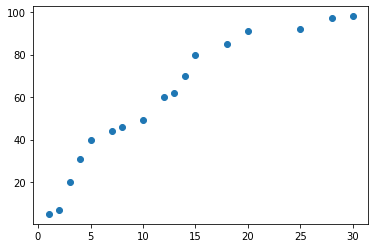

In [18]:
# 1. Training Data Set

import numpy as np
import matplotlib.pyplot as plt

# Training Data Set
x_data = np.array([1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30]).reshape(-1,1)
t_data = np.array([5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]).reshape(-1,1)

# 데이터의 분포를 scatter로 확인
plt.scatter(x_data.ravel(), t_data.ravel())
plt.show()

In [25]:
# 2. Linear Regression Model을 정의
W = np.random.rand(1, 1) # matrix
b = np.random.rand(1) # scalar

# H = W * x + b 

# 3.loss function을 정의
def loss_func(x, t):
    y = np.dot(x, W) + b   # Hypothesis = Wx + b
    return np.mean(np.power((t-y), 2))  # 최소제곱법


# 미분 함수
def numerical_derivative(f, x):
    # f: 미분하려고 하는 다변수 함수
    # x : 모든 변수를 포함하고 있어야 한다. ndarray (차원 상관 없이)
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x) # 미분한 결과를 저장하는 ndarray
    
    # iterator를 이용해서 입력변수 x에 대해 편미분을 수행
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        idx = it.multi_index # iterator의 현재 index를 추출
        # 현재 칸의 값을 어딘가에 잠시 저장한다.
        tmp = x[idx]
        
        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)    # f(x + delta_x)
        
        x[idx] = tmp - delta_x
        fx_minus_delta = f(x)   # f(x - delta_x)
    
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp # 데이터 원상 복구
        
        it.iternext()
    
    return  derivative_x


# 학습 종료 후 임의의 데이터에 대한 예측값을 알아오는 함수
# prediction
def predict(x):
    return np.dot(x, W) + b   # Hypothesis, Linear Regression Model


# 4. learning rate 상수가 필요, 정의
learning_rate = 0.0001

# 미분을 진행할 loss_func()에 대한 lambda 함수를 정의
f = lambda x : loss_func(x_data, t_data)

W : [[3.21310136]], b : [16.81930068], loss : 88.34487383909192
W : [[3.21201029]], b : [16.83974906], loss : 88.34439476845088
W : [[3.21140273]], b : [16.85113591], loss : 88.34424621284707
W : [[3.2110644]], b : [16.85747677], loss : 88.34420014705736
W : [[3.210876]], b : [16.86100773], loss : 88.34418586246
W : [[3.21077108]], b : [16.86297398], loss : 88.34418143293162
W : [[3.21071266]], b : [16.8640689], loss : 88.34418005937373
W : [[3.21068013]], b : [16.86467861], loss : 88.34417963344546
W : [[3.21066201]], b : [16.86501814], loss : 88.34417950136886
W : [[3.21065193]], b : [16.86520721], loss : 88.34417946041307
[[77.86759235]]


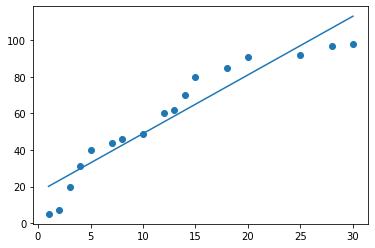

In [24]:
# 5. 학습을 진행
# W와 b를 update하면서 반복적으로 학습 진행
for step in range(90000):
    W = W - learning_rate * numerical_derivative(f,W)  # W의 편미분
    b = b - learning_rate * numerical_derivative(f,b)  # b의 편미분
    
    if step % 9000 == 0:
        print('W : {}, b : {}, loss : {}'.format(W, b, loss_func(x_data, t_data)))
        
# 학습 종료 후 예측
print(predict(19))

# 데이터의 분포를 scatter로 확인
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), np.dot(x_data,W) + b)  # 직선
plt.show()